In [115]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [43]:
round(np.std([i for i in range(100) ], ddof = 1), 3)

29.011

In [44]:
df = pd.read_csv('/home/borislav/Загрузки/games.csv')

In [45]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [46]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [47]:
df = df.dropna()

In [48]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [49]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [50]:
x, y = df.Year.mode(), df.Year.median()

In [51]:
x

0    2009.0
Name: Year, dtype: float64

In [52]:
y

2007.0

In [53]:
x = df.groupby('Platform').agg({'Name':'count'}).sort_values(by = 'Name', ascending= False)

In [54]:
x['percentage'] = x.Name / x.Name.sum() * 100

In [55]:
res = x[x.percentage > 7].reset_index()

In [56]:
y1 = res.Platform.to_list()

In [21]:
df = df[df.Platform.isin(y1)]

In [57]:
df.groupby('Publisher').agg({'Rank':'count'}).sort_values('Rank', ascending= False)

,Rank
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
...,...
Ertain,1
Epic Games,1
Seventh Chord,1


In [98]:
nintendo = df[df['Publisher'] == "Nintendo"]

In [109]:
nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].agg(['median','std','mean'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
median,0.375000,0.120000,0.280000,0.030000
std,2.989913,1.743953,1.063110,0.464170
mean,1.172055,0.601006,0.653721,0.136767


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

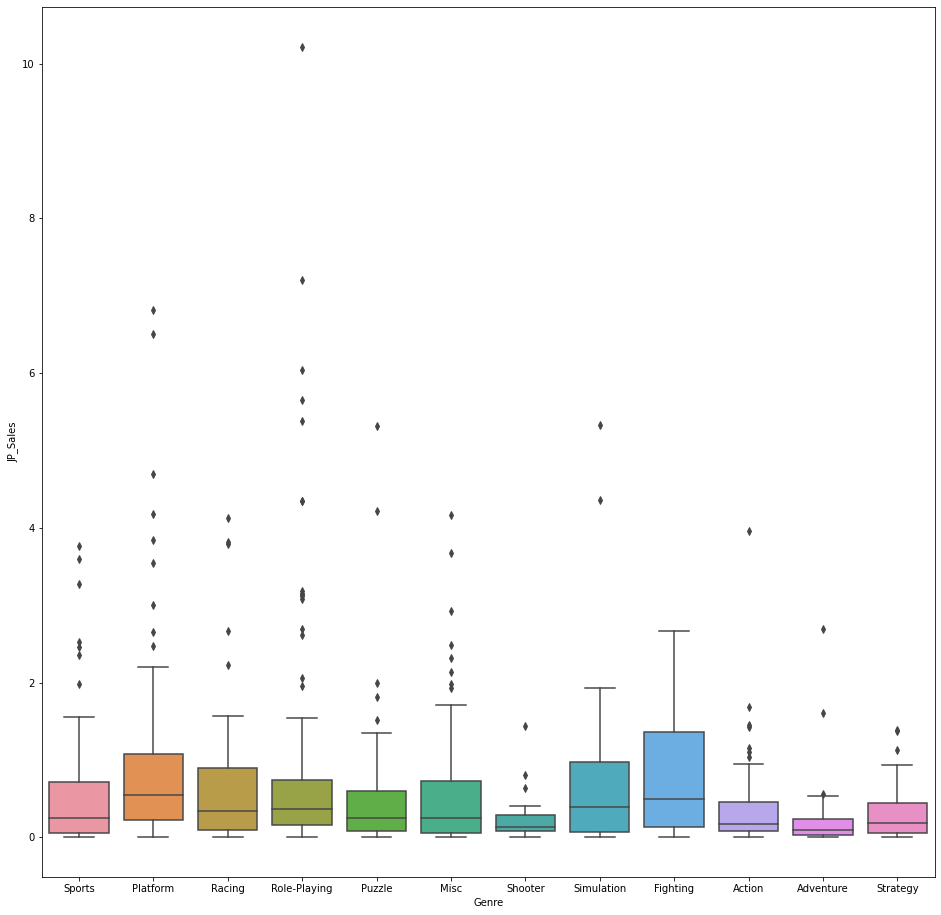

In [116]:
plt.figure(figsize=(16,16))
sns.boxplot(y = nintendo.JP_Sales, x = nintendo.Genre)

In [102]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [129]:
nintendo = df[df['Publisher'] == "Nintendo"]

In [152]:
viz = nintendo[nintendo['Genre'].isin(['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports'])]

In [160]:
viz = viz.groupby(['Genre','Year'])['Rank'].agg('count').reset_index()

<AxesSubplot:xlabel='Year', ylabel='Rank'>

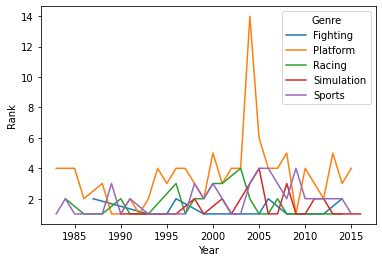

In [163]:
sns.lineplot(x = viz.Year, y = viz.Rank, hue = viz.Genre)

In [162]:
viz

,Genre,Year,Rank
0,Fighting,1987.0,2
1,Fighting,1993.0,1
2,Fighting,1995.0,1
3,Fighting,1996.0,2
4,Fighting,1999.0,1
...,...,...,...
109,Sports,2010.0,2
110,Sports,2012.0,2
111,Sports,2013.0,2
112,Sports,2014.0,2
